# Getting deeper with Keras
* Tensorflow is a powerful and flexible tool, but coding large neural architectures with it is tedious.
* There are plenty of deep learning toolkits that work on top of it like Slim, TFLearn, Sonnet, Keras.
* Choice is matter of taste and particular task
* We'll be using Keras

In [1]:
import numpy as np
import tensorflow as tsf
import keras
from keras import regularizers

import ssl
ssl._create_default_https_context = ssl._create_unverified_context

Using TensorFlow backend.
Using TensorFlow backend.


In [2]:
def load_dataset():
    (X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

    # we reserve the last 10000 training examples for validation
    X_train, X_val = X_train[:-10000], X_train[-10000:]
    y_train, y_val = y_train[:-10000], y_train[-10000:]

    return X_train, y_train, X_val, y_val, X_test, y_test

In [3]:
X_train, y_train, X_val, y_val, X_test, y_test = load_dataset()

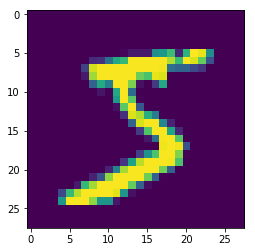

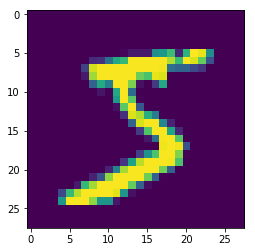

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(X_train[0]);

### Task:
- Build NN using Keras with couple of layers with linear activation function
- Play with variout nonlinear activation functions
- Calculate loss on validation set and plot it for diffrent iterations for all architectures
- Try to normalize data
- Use regularization (L1, L2, Dropout)
- Optimize number of neurons, learning_rate, regularization coefficient and optimizer
- Try Batch Normalization
- Save and load trained model and weights

### Data view

In [5]:
X_train.shape, y_train.shape

((50000, 28, 28), (50000,))

((50000, 28, 28), (50000,))

In [6]:
print(len(X_train), len(y_train))

50000 50000
50000 50000


In [7]:
print(type(X_train), type(y_train))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [8]:
print(np.unique(X_train))

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

In [9]:
print(np.unique(y_train))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [10]:
print(X_val, y_val)

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]] [3 8 6 ... 5 6 8]
[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0

### Preprocessing

In [11]:
# Normalization parametrs
X_train = np.divide(X_train,  255.)
X_test = np.divide(X_test,  255.)
X_val = np.divide(X_val, 255.)

# Reshape
X_train = X_train.reshape(50000, 784)
X_test = X_test.reshape(10000, 784)
X_val = X_val.reshape(10000, 784)

Еще нам понадобится преобразовать метки классов к матричному виду для обучения с помощью кросс-энтропии. Для этого мы переведем номер класса в так называемый one-hot вектор, т.е. вектор, состоящий из нулей и одной единицы.

In [12]:
num_classes = np.max(y_train) + 1
print(num_classes, 'classes')

10 classes
10 classes


In [13]:
print('Convert class vector to binary class matrix '
      '(for use with categorical_crossentropy)')
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
y_val = keras.utils.to_categorical(y_val, num_classes)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)
print('y_val shape:', y_val.shape)

Convert class vector to binary class matrix (for use with categorical_crossentropy)
y_train shape: (50000, 10)
y_test shape: (10000, 10)
y_val shape: (10000, 10)
Convert class vector to binary class matrix (for use with categorical_crossentropy)
y_train shape: (50000, 10)
y_test shape: (10000, 10)
y_val shape: (10000, 10)


## Build Model

### Functional API

In [14]:
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Input

In [61]:
print('Building model functionally...')
a = Input(shape=(784,))
b = Dense(256, activation = 'relu')(a)
b = Dropout(0.5)(b)
b = Dense(num_classes)(b)
b = Activation('softmax')(b)
model = Model(inputs=a, outputs=b)

Building model functionally...
Building model functionally...


In [62]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        (None, 784)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 256)               200960    
_________________________________________________________________
dropout_8 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 10)                2570      
_________________________________________________________________
activation_14 (Activation)   (None, 10)                0         
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
None
_________________________________________________________________
Layer (type)                 Output Shape              Param #   

### Model compile

In [63]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report

In [64]:
# skv = StratifiedKFold(n_splits = 4)
# tuning_params = [
#     {
#         'optimizer' : ['adam', 'SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adamax'],
#         'loss' : ['mean_squared_error', 'categorical_crossentropy', 'mean_absolute_error', 'sparse_categorical_accuracy'],
#         'metrics' : ['accuracy', 'mae', 'acc']
#     }
# ]

# clf_grd = GridSearchCV(estimator = KerasClassifier, param_grid = tuning_params, cv = skv)

In [65]:
# clf_grd.fit(X_train, y_train)

In [66]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [67]:
batch_size = 30
epochs = 10
history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data = (X_val, y_val))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 9s 172us/step - loss: 0.3350 - acc: 0.9005 - val_loss: 0.1484 - val_acc: 0.9585
Epoch 2/10
50000/50000 [==============================] - 8s 162us/step - loss: 0.1768 - acc: 0.9466 - val_loss: 0.1056 - val_acc: 0.9692
Epoch 3/10
50000/50000 [==============================] - 8s 170us/step - loss: 0.1431 - acc: 0.9560 - val_loss: 0.0897 - val_acc: 0.9744
Epoch 4/10
50000/50000 [==============================] - 9s 187us/step - loss: 0.1229 - acc: 0.9623 - val_loss: 0.0806 - val_acc: 0.9766
Epoch 5/10
50000/50000 [==============================] - 10s 193us/step - loss: 0.1098 - acc: 0.9657 - val_loss: 0.0821 - val_acc: 0.9760
Epoch 6/10
50000/50000 [==============================] - 10s 199us/step - loss: 0.1000 - acc: 0.9694 - val_loss: 0.0775 - val_acc: 0.9770
Epoch 7/10
50000/50000 [==============================] - 1

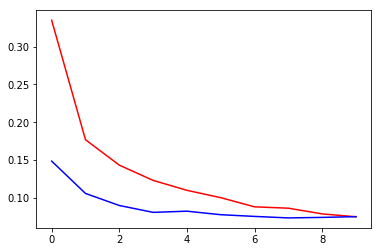

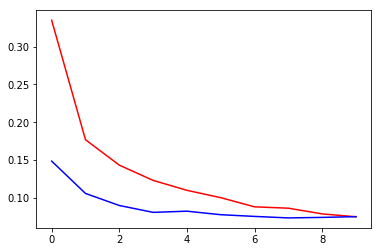

In [68]:
plt.plot(history.history['loss'], 'red')
plt.plot(history.history['val_loss'], 'blue')

И наконец, тестирование. Метод evaluate получает на вход тестовую выборку вместе с метками для нее. Метрика была задана еще при подготовке к работе, так что больше ничего не нужно. (Но мы укажем еще размер батча).

In [28]:
score = model.evaluate(X_test, y_test, batch_size=batch_size)

10000/10000 [==============================] - 0s 44us/step


### Callbacks

In [70]:
from keras.callbacks import EarlyStopping  
early_stopping=EarlyStopping(monitor='val_acc', patience=2, mode='max', min_delta=0.0001, verbose=1)  
print(early_stopping.monitor)

batch_size = 30
epochs = 15
history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_test, y_test),
                    callbacks=[early_stopping])

val_acc
Train on 50000 samples, validate on 10000 samples
Epoch 1/15
   30/50000 [..............................] - ETA: 15s - loss: 0.1387 - acc: 0.9000val_acc
Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 9s 177us/step - loss: 0.0717 - acc: 0.9767 - val_loss: 0.0696 - val_acc: 0.9808
Epoch 2/15
50000/50000 [==============================] - 9s 177us/step - loss: 0.0675 - acc: 0.9788 - val_loss: 0.0731 - val_acc: 0.9807
Epoch 3/15
50000/50000 [==============================] - 8s 168us/step - loss: 0.0627 - acc: 0.9801 - val_loss: 0.0769 - val_acc: 0.9793
Epoch 00003: early stopping
Epoch 00003: early stopping


In [69]:
score = model.evaluate(X_test, y_test,
                       batch_size=batch_size, verbose=1)
print('\n')
print('Test score:', score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 0s 44us/step


Test score: 0.07576253227069901
Test accuracy: 0.9782999924421311


Test score: 0.07576253227069901
Test accuracy: 0.9782999924421311


10000/10000 [==============================] - 0s 41us/step
10000/10000 [==============================] - 0s 41us/step


Test score: 0.07280721978779502
Test accuracy: 0.9800999932289124


Test score: 0.07280721978779502
Test accuracy: 0.9800999932289124

In [ ]:
plt.plot(history.history['loss'], 'red')
plt.plot(history.history['val_loss'], 'blue')